# Part I - (Prosper Loan)
## by (Aude Armelle Djofang Wounfa)

## Introduction
> Prosper Loan data contain  113 937 loans with 81 variables for each loan. There are details about each loan like the original amount of the loan,the status of the loan, the annual Percentage rate, is the borrower have a house, his state etc This dataset has all the information about the loan and the borrower. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Loading of the datset. 


In [2]:
# Loading and reading of the data
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#Getting the dimension of our dataset
df.shape

(113937, 81)

In [4]:
#The list if all the 81 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> We are going to choose 16 variables on each loan to work with. The variables are both numerical and categorical. The categorical variable are Loan status, Income Range and Term are categorical two of them are strings. We will interest our study on the characteristic of the borrower. Which category of people borrow the most, or which reasons the loan is taken for, how the Annual percentage rate, term, recommendation and other affect the original amount of the loan.
 
### What is/are the main feature(s) of interest in your dataset?

>  LoanOriginalAmount, Borrower APR, Borrower Rate, Term

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Loankey
> MemberKey
> LoanStatus
> LoanOriginalAmount
> Term
> Borrower APR
> Borrower Rate
> IncomeRange
> DebtToIncomeRation
> Occupation
> EmploymentStatus
> ListingCategory
> IsBorrowerHomeowner
> LoanMonthsSinceOrigination
>CreditScoreRangeUpper
> Recommendation


In [5]:
# let's create the new Dataset thet we will explore
columns=["LoanKey","MemberKey","LoanOriginalAmount","Term","LoanStatus","BorrowerRate","BorrowerAPR","IncomeRange","DebtToIncomeRatio","CreditScoreRangeUpper","Occupation","EmploymentStatus","ListingCategory (numeric)","IsBorrowerHomeowner","LoanMonthsSinceOrigination","Recommendations"]
df=pd.DataFrame(df, columns=columns)
df.head()

,LoanKey,MemberKey,LoanOriginalAmount,Term,LoanStatus,BorrowerRate,BorrowerAPR,IncomeRange,DebtToIncomeRatio,CreditScoreRangeUpper,Occupation,EmploymentStatus,ListingCategory (numeric),IsBorrowerHomeowner,LoanMonthsSinceOrigination,Recommendations
0,E33A3400205839220442E84,1F3E3376408759268057EDA,9425,36,Completed,0.1580,0.16516,"$25,000-49,999",0.17,659.0,Other,Self-employed,0,True,78,0
1,9E3B37071505919926B1D82,1D13370546739025387B2F4,10000,36,Current,0.0920,0.12016,"$50,000-74,999",0.18,699.0,Professional,Employed,2,False,0,0
2,6954337960046817851BCB2,5F7033715035555618FA612,3001,36,Completed,0.2750,0.28269,Not displayed,0.06,499.0,Other,Not available,0,False,86,0
3,A0393664465886295619C51,9ADE356069835475068C6D2,10000,36,Current,0.0974,0.12528,"$25,000-49,999",0.15,819.0,Skilled Labor,Employed,16,True,16,0
4,A180369302188889200689E,36CE356043264555721F06C,15000,36,Current,0.2085,0.24614,"$100,000+",0.26,699.0,Executive,Employed,2,True,6,0


In [6]:
# Getting information on the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LoanKey                     113937 non-null  object 
 1   MemberKey                   113937 non-null  object 
 2   LoanOriginalAmount          113937 non-null  int64  
 3   Term                        113937 non-null  int64  
 4   LoanStatus                  113937 non-null  object 
 5   BorrowerRate                113937 non-null  float64
 6   BorrowerAPR                 113912 non-null  float64
 7   IncomeRange                 113937 non-null  object 
 8   DebtToIncomeRatio           105383 non-null  float64
 9   CreditScoreRangeUpper       113346 non-null  float64
 10  Occupation                  110349 non-null  object 
 11  EmploymentStatus            111682 non-null  object 
 12  ListingCategory (numeric)   113937 non-null  int64  
 13  IsBorrowerHome

- our dataset has 16 columns with different types 6 object, 5 integer, 4 float, and 1 boolean.
- We observe that 5 columns (BorrowerAPR,DebtToIncomeRatio,CreditScoreRangeUpper,Occupation,EmploymentStatus) have missing data. We are going to investigate more in the next step

##### Missing values

BorrowerAPR                25
DebtToIncomeRatio        8554
CreditScoreRangeUpper     591
Occupation               3588
EmploymentStatus         2255
dtype: int64


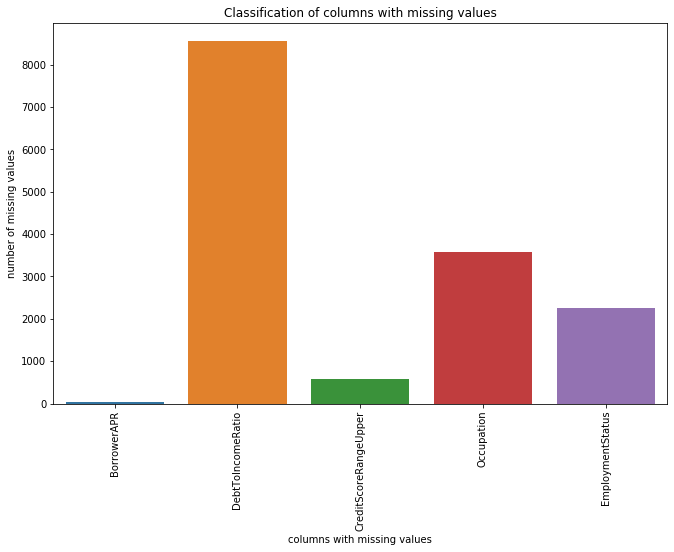

In [7]:
#Plot of missing values
plt.figure(figsize=(11,7))
#clean columns
clean_column=['LoanKey', 'MemberKey', 'LoanOriginalAmount','Term','LoanStatus','BorrowerRate','IncomeRange','ListingCategory (numeric)','IsBorrowerHomeowner','LoanMonthsSinceOrigination','Recommendations']
# Abandonnons les colonnes qui n'ont pas de valeurs NaN/None
na_counts = df.drop(clean_column, axis=1).isna().sum()
print(na_counts)
sb.barplot(na_counts.index.values, na_counts)
plt.xticks(rotation=90)
plt.xlabel('columns with missing values')
plt.ylabel('number of missing values')
plt.title('Classification of columns with missing values')
# Logique pour imprimer la valeur sur chaque barre
for i in range (na_counts.shape[0]):
    count = na_counts[i]

- Debt to income has the highest number of missing values followed by occupation and employment status.
- It is said in the prosper loan document that Debt to income ration should be set at 0 if the information is not available
- So we are going to replace nan value by 0 in 'DebtToIncomeRatio'

In [8]:
# replacing na by '0' in 'DebtToIncomeRatio'
df['DebtToIncomeRatio'].fillna(value = 0, inplace=True)

In [9]:
# Test
df.DebtToIncomeRatio.isnull().sum()

0

- We successfully filled missing values in DebtToIncomeRatio column. We do not have much information about the others column with missing value. we will perform cleaning gradually. Now we are going to explore our dataset. We are going to adress other missing values when checking our data column after column. 

## Univariate Exploration



### 1) Are there loan that have been asked several times ?

In [10]:
df['LoanKey'].duplicated().sum()

871

- There are 871 loans that have been treated several time. How many time could this be done?

In [11]:
df.LoanKey.value_counts().sort_values(ascending=False).head(10)

CB1B37030986463208432A1    6
2DEE3698211017519D7333F    4
D895370150591392337ED6D    4
E6FB37073953690388BC56D    4
9F4B37043517554537C364C    4
8CD1369980892613296C7B8    3
A9363708198234406C697E5    3
1C10370687519959757D4E0    3
50F23708735181834951669    3
911C37054950043529AF24C    3
Name: LoanKey, dtype: int64

- There are Loans treated 6 times. This may be due to an irregularity in the procedure ( missing documents) or something else. 

In [12]:
df['LoanKey'].isna().sum()

0

- There ar no missing value on LoanKey but there are Loans that are registered more than once. Since LoanKey represent the unique value of a loan it means there are loans that are duplicated and we are going to drop them and keep the last registration.

In [15]:
# Dropping the duplicated url but keep the most recent one
#df = df.drop_duplicates(subset=['LoanKey'], keep='last')

In [16]:
#Test
#sum(df['LoanKey'].duplicated())

- We succesfully drop all duplicated Loan Keys.

### Are there borrowers with more than one loan?

In [17]:
df['MemberKey'].duplicated().sum()

23106

In [18]:
df.MemberKey.value_counts()

63CA34120866140639431C9    9
C45F3365236450678BA344C    8
7E1733653050264822FAA3D    8
4D9C3403302047712AD0CDD    8
16083364744933457E57FB9    8
                          ..
461F3406525930213486F7B    1
2F863387799429873C1A41B    1
39BD3382189204865D2D349    1
2FD1358578761460622F105    1
986D3405983604625B69512    1
Name: MemberKey, Length: 90831, dtype: int64

- There are 23106 borrowers with more than one loan. There are borrower with 9 loans. What is the amount range of the loan

### What is the loan original amount range and what is the most taken amount?

In [19]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

- There are 113937 loans ranging from 4000 Dollars to 12000 Dollars. 

In [20]:
#Let's define a drawing function to plot histogram 
def draw_hist(dataframe, column_name, titre='Loan Original amount range'):
    dataframe[column_name].plot(kind='hist')
    plt.title(titre)
    plt.legend()
plt.show()

Text(0, 0.5, 'Number of loans')

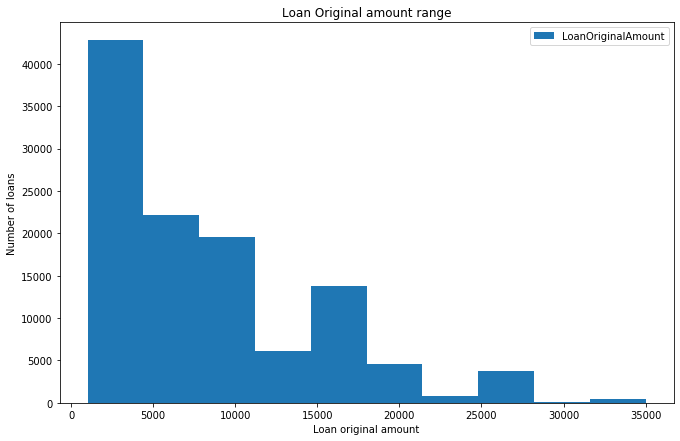

In [21]:
#defining the size of the figure
plt.figure(figsize=(11,7))
#Plotting of Original amount histogram 
draw_hist(df, 'LoanOriginalAmount', titre='Loan Original amount range')
#setting axis and plot titles
plt.xlabel("Loan original amount")
plt.ylabel("Number of loans")



- The most taken amount is less than 5000. What affect this amount? is this because of the borrower rate or the Borrower APR? may be because majority of borrower are student or they are not employed. 
- We will study the relation between loan original amount and each of the characteristic of the borrower(Creditscore,occupation, APR,...) to better understand this.

### What is the  CreditScoreRangeUpper? How does this score influence the loan original amount? 

In [22]:
# Descriptive statistiques
df['CreditScoreRangeUpper'].describe()

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

Text(0, 0.5, 'Frequency')

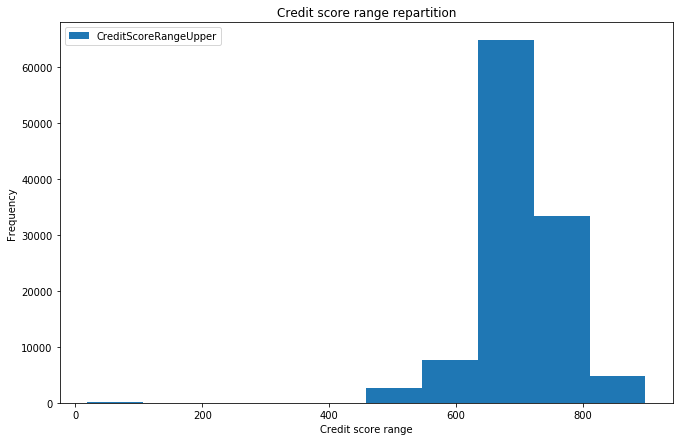

In [23]:
#defining the size of the figure
plt.figure(figsize=(11,7))
#graphic representation of credit score range
draw_hist(df, 'CreditScoreRangeUpper', titre='Credit score range repartition')
#setting axis title
plt.xlabel('Credit score range')
plt.ylabel('Frequency')


- The majority of borrower has an upper  credit score close to 700. The histogram is right skew this means there are outliers. Let's explore this with a box plot.

Text(0.5, 1.0, 'Box Plot of the borrowers Credit Score range')

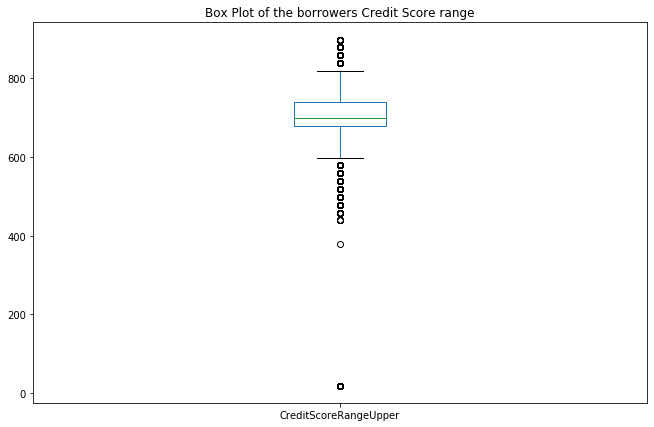

In [24]:
#Detection of outliers with box plot 
plt.figure(figsize=(11,7))
df['CreditScoreRangeUpper'].plot(kind='box')
plt.title('Box Plot of the borrowers Credit Score range')

- Loan are not harmonious. There are outliers below 400. let's get more insights for values between 600 and 800.

In [25]:
# Describe data with a upper credit score range greater than 800 
df.query('CreditScoreRangeUpper > 800 ').describe()

,LoanOriginalAmount,Term,BorrowerRate,BorrowerAPR,DebtToIncomeRatio,CreditScoreRangeUpper,ListingCategory (numeric),LoanMonthsSinceOrigination,Recommendations
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,11128.001235,40.094670,0.107015,0.122615,0.188106,832.529533,3.182754,35.796254,0.068738
std,7531.538767,11.144809,0.049361,0.056669,0.525550,17.673265,3.876854,26.989531,0.474340
min,1000.000000,12.000000,0.000000,0.016500,0.000000,819.000000,0.000000,0.000000,0.000000
25%,5000.000000,36.000000,0.075900,0.085910,0.080000,819.000000,1.000000,12.000000,0.000000
50%,10000.000000,36.000000,0.093000,0.103750,0.140000,819.000000,2.000000,28.000000,0.000000
75%,15000.000000,36.000000,0.120650,0.143410,0.220000,839.000000,3.000000,54.000000,0.000000
max,35000.000000,60.000000,0.350000,0.387230,10.010000,899.000000,20.000000,95.000000,16.000000


   - The most common credit score range upper greater than 800 is 819.  People that have this credit score  usually borrow an original amount of 10 000 Dollars within 36 month with an APR of 0.15 and have 0 recommendation. 4850 people has an upper credit score greater than 800. It maximal value is 839. 

In [26]:
# Describe data with a upper credit score range Less than 600
df.query('CreditScoreRangeUpper <600 ').describe()

,LoanOriginalAmount,Term,BorrowerRate,BorrowerAPR,DebtToIncomeRatio,CreditScoreRangeUpper,ListingCategory (numeric),LoanMonthsSinceOrigination,Recommendations
count,6765.000000,6765.0,6765.000000,6765.000000,6765.000000,6765.000000,6765.000000,6765.000000,6765.000000
mean,2885.931412,36.0,0.254987,0.270384,0.261453,545.678492,0.787140,81.439024,0.119438
std,2212.917171,0.0,0.060313,0.062680,0.783245,80.709694,1.713147,8.286935,0.417940
min,1000.000000,36.0,0.000000,0.008640,0.000000,19.000000,0.000000,65.000000,0.000000
25%,1500.000000,36.0,0.220000,0.233860,0.080000,539.000000,0.000000,74.000000,0.000000
50%,2550.000000,36.0,0.260000,0.275150,0.160000,559.000000,0.000000,84.000000,0.000000
75%,3495.000000,36.0,0.290000,0.305640,0.260000,579.000000,1.000000,88.000000,0.000000
max,25000.000000,36.0,0.360000,0.413550,10.010000,599.000000,7.000000,95.000000,7.000000


- There are outliers for CreditScoreRangeUpper <400

In [27]:
#Let's remove the Outliers
df.drop(df.query('CreditScoreRangeUpper <400 ').index, inplace=True)

### What are the loans taken for ( ListingCategory (numeric))?

In [28]:
# summary Statistic of listing category(what is the loan taken for?)
df['ListingCategory (numeric)'].describe()

count    113803.000000
mean          2.777475
std           3.998014
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          20.000000
Name: ListingCategory (numeric), dtype: float64

In [29]:
# grouping each category and the number of occurence
df['ListingCategory (numeric)'].value_counts()

1     58308
0     16831
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

- Numeric information in this column does not give much information about its contain. We are going to create a column ('LoanReason') with categorical data that explain it clearly and drop listingCategory(numeric) column

In [30]:

df['LoanReason']=''
df.loc[df['ListingCategory (numeric)']==0,'LoanReason']='Not available'
df.loc[df['ListingCategory (numeric)']==1,'LoanReason']='Debt consolidation'
df.loc[df['ListingCategory (numeric)']==2,'LoanReason']='Home Improvement'
df.loc[df['ListingCategory (numeric)']==3,'LoanReason']='Business'
df.loc[df['ListingCategory (numeric)']==4,'LoanReason']='Personal Loan'
df.loc[df['ListingCategory (numeric)']==5,'LoanReason']='Student Use'
df.loc[df['ListingCategory (numeric)']==6,'LoanReason']='Auto'
df.loc[df['ListingCategory (numeric)']==7,'LoanReason']='Others'
df.loc[df['ListingCategory (numeric)']==8,'LoanReason']='Baby & Adoption'
df.loc[df['ListingCategory (numeric)']==9,'LoanReason']='Boat'
df.loc[df['ListingCategory (numeric)']==10,'LoanReason']='Cosmetic procedure'
df.loc[df['ListingCategory (numeric)']==11,'LoanReason']='Engagement ring'
df.loc[df['ListingCategory (numeric)']==12,'LoanReason']='Green Loans'
df.loc[df['ListingCategory (numeric)']==13,'LoanReason']='Household Expenses'
df.loc[df['ListingCategory (numeric)']==14,'LoanReason']='Large Purchases'
df.loc[df['ListingCategory (numeric)']==15,'LoanReason']='medical/Dental'
df.loc[df['ListingCategory (numeric)']==16,'LoanReason']='Motorcycle'
df.loc[df['ListingCategory (numeric)']==17,'LoanReason']='RV'
df.loc[df['ListingCategory (numeric)']==18,'LoanReason']='Taxes'
df.loc[df['ListingCategory (numeric)']==19,'LoanReason']='Vacation'
df.loc[df['ListingCategory (numeric)']==20,'LoanReason']='Wedding Loans'


In [31]:
#Let's drop 'ListingCategory (numeric)' column
df.drop('ListingCategory (numeric)',axis=1, inplace=True)

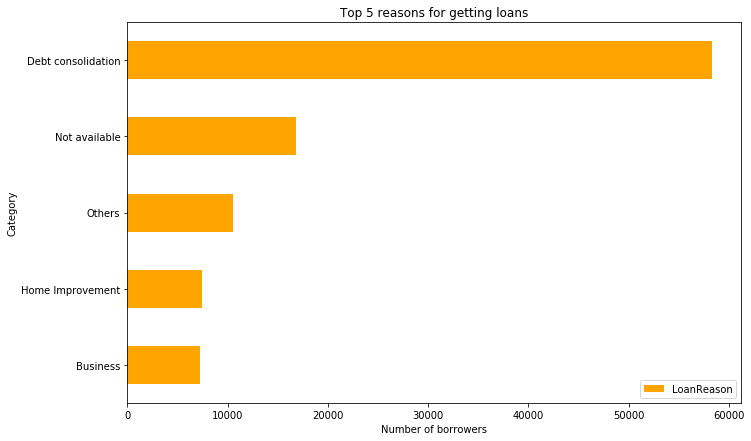

In [32]:
#Plotting of repartition of loan reasons
# Setting the figure size
plt.figure(figsize=(11,7))
# classify the top 5 loan reasons from the less used to the most 
top_cat= df['LoanReason'].value_counts().head(5).sort_values(ascending=True)
# histogram representation of loan reason
top_cat.plot(kind='barh', color='orange')
# setting axis title
plt.title('Top 5 reasons for getting loans')
plt.xlabel('Number of borrowers')
plt.ylabel('Category')
plt.legend()


- More than 50% of borrowers get a loan for debt consolidation. this is interesting let's invesigate more on borrowers that take debt consolidation loan. 

In [33]:
# Saving loans taken for debt consolidation
Debt_consolidation=df.query('LoanReason=="Debt consolidation"')
Debt_consolidation

,LoanKey,MemberKey,LoanOriginalAmount,Term,LoanStatus,BorrowerRate,BorrowerAPR,IncomeRange,DebtToIncomeRatio,CreditScoreRangeUpper,Occupation,EmploymentStatus,IsBorrowerHomeowner,LoanMonthsSinceOrigination,Recommendations,LoanReason
5,C3D63702273952547E79520,874A3701157341738DE458F,15000,60,Current,0.1314,0.15425,"$100,000+",0.36,759.0,Professional,Employed,True,3,0,Debt consolidation
6,CE963680102927767790520,AA4535764146102879D5959,3000,36,Current,0.2712,0.31032,"$25,000-49,999",0.27,699.0,Sales - Retail,Employed,False,11,0,Debt consolidation
10,7C083651269973612460D6D,495135444217488604DC05A,13500,60,Current,0.2489,0.27462,"$75,000-99,999",0.12,659.0,Fireman,Employed,False,22,0,Debt consolidation
12,209F3701889728853CD17F7,9F9C37005448788963E33D3,4000,36,Past Due (1-15 days),0.1435,0.17969,"$25,000-49,999",0.18,699.0,Sales - Retail,Employed,False,2,0,Debt consolidation
13,C7F936888258982629356F0,576B35832224805087429E3,8500,36,Current,0.1034,0.13138,"$50,000-74,999",0.09,759.0,Construction,Employed,True,8,0,Debt consolidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113925,B5FC3682174533953146478,099F357317238787760B356,4000,36,Current,0.2712,0.31032,"$25,000-49,999",0.28,699.0,Homemaker,Employed,False,10,0,Debt consolidation
113930,AF80368651203735984C668,89A735620041442181964DB,3000,36,Current,0.1639,0.20053,"$75,000-99,999",0.20,699.0,Professional,Employed,True,8,0,Debt consolidation
113932,9BD7367919051593140DB62,2EC435768441332602FDC15,10000,36,Current,0.1864,0.22354,"$50,000-74,999",0.13,719.0,Food Service Management,Employed,True,11,0,Debt consolidation
113934,DD1A370200396006300ACA0,0FE0370029359765342FDB5,10000,60,Current,0.2150,0.23984,"$25,000-49,999",0.51,719.0,Other,Employed,True,3,0,Debt consolidation


- There are 57624 loans for debt consolidations. We are going to study this deeply in the coming sections 

Text(0.5, 1.0, ' Debt consolidation statistic')

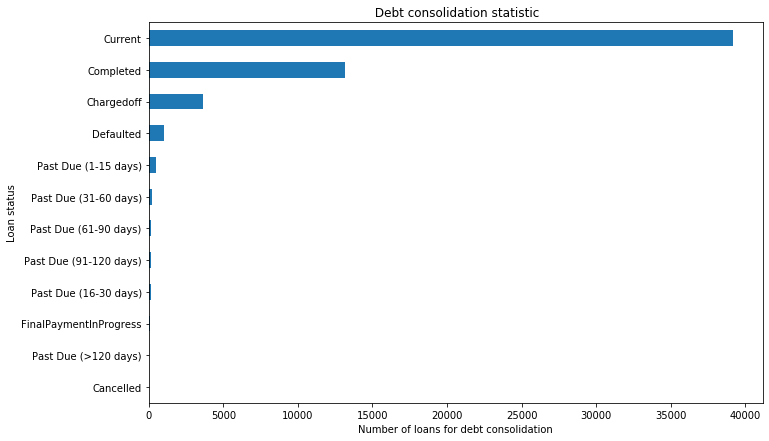

In [34]:
#defining the size of the figure
plt.figure(figsize=(11,7))
# Plotting of the repartition of loan assign to debt consolidation
Debt_consolidation.LoanStatus.value_counts().sort_values(ascending=True).plot(kind='barh')
#setting axis and plot titles 
plt.xlabel('Number of loans for debt consolidation')
plt.ylabel('Loan status')
plt.title(' Debt consolidation statistic')

- Most of debt_consolidation are still current. But there are some charged of we will look at this deeply in the bivariate and multivariate studies

###   What are the IncomeRange of the borrowers?               
             

In [35]:
#Summary statistic of  borrower income range
df['IncomeRange'].describe()

count             113803
unique                 8
top       $25,000-49,999
freq               32192
Name: IncomeRange, dtype: object

 - We have 8 ranges. The majority of the borrower has an income ranging from 25,000 dollars to 49,999 dollars.

Text(0.5, 1.0, 'Income range classification ')

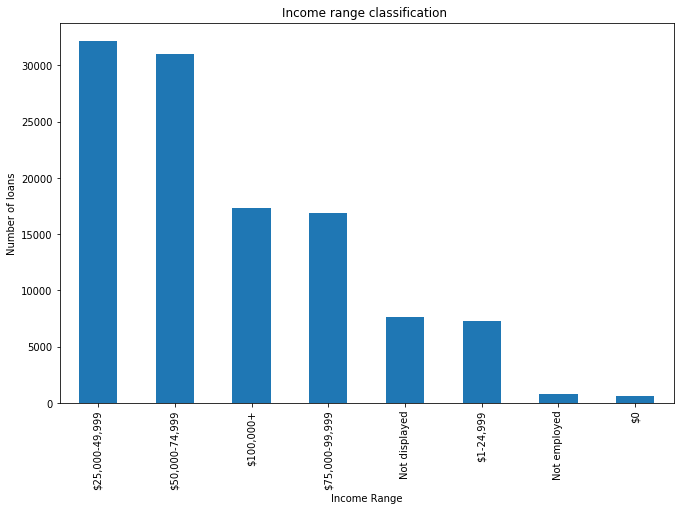

In [36]:
#Graphic representation of borrower income Range
#Setting the size of the figure
plt.figure(figsize=(11,7))
#Plot of bar charts
df['IncomeRange'].value_counts().plot(kind='bar')
# Setting titles
plt.xlabel('Income Range')
plt.ylabel('Number of loans')
plt.title('Income range classification ')

- The borrowers income range mostly between 25,000-49,999 Dollars and 50,000 -74,999 Dollars. Some borrowers refused to display their income. let's have the percentage of borrowers per range

In [37]:
#Let's find the percentage
df["IncomeRange"].value_counts()/df.shape[0]*100

$25,000-49,999    28.287479
$50,000-74,999    27.283991
$100,000+         15.234221
$75,000-99,999    14.864283
Not displayed      6.684358
$1-24,999          6.391747
Not employed       0.708241
$0                 0.545680
Name: IncomeRange, dtype: float64

- People that have  income ranging between 25,000 to 49,999 Dollars borrow the most.They are 28.28% of all the borrower followed by the range of 50,000-74,999 Dollars. Debt-to-income ratio (DTI) compares how much you owe each month to how much you earn. Let study it next.

### 6   What is the DebtToIncomeRatio  of the borrowers?    

In [38]:
#Summary statistic
df['DebtToIncomeRatio'].describe()

count    113803.000000
mean          0.255473
std           0.535827
min           0.000000
25%           0.130000
50%           0.210000
75%           0.310000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [39]:
df.query('DebtToIncomeRatio>10' ).describe(include='all')

,LoanKey,MemberKey,LoanOriginalAmount,Term,LoanStatus,BorrowerRate,BorrowerAPR,IncomeRange,DebtToIncomeRatio,CreditScoreRangeUpper,Occupation,EmploymentStatus,IsBorrowerHomeowner,LoanMonthsSinceOrigination,Recommendations,LoanReason
count,272,272,272.000000,272.000000,272,272.000000,272.000000,272,2.720000e+02,272.000000,266,266,272,272.000000,272.000000,272
unique,272,258,NaN,NaN,6,NaN,NaN,5,NaN,NaN,38,8,2,NaN,NaN,10
top,F63B3379507225528FF1103,FF1B34297677368384F27F8,NaN,NaN,Completed,NaN,NaN,"$1-24,999",NaN,NaN,Other,Self-employed,False,NaN,NaN,Not available
freq,1,3,NaN,NaN,124,NaN,NaN,187,NaN,NaN,130,74,145,NaN,NaN,216
mean,NaN,NaN,8295.518382,36.617647,NaN,0.201344,0.215038,NaN,1.001000e+01,687.823529,NaN,NaN,NaN,71.930147,0.246324,NaN
std,NaN,NaN,7081.477918,4.329695,NaN,0.072887,0.078779,NaN,4.805004e-14,77.916208,NaN,NaN,NaN,23.294178,0.740241,NaN
min,NaN,NaN,1000.000000,12.000000,NaN,0.010000,0.023230,NaN,1.001000e+01,479.000000,NaN,NaN,NaN,6.000000,0.000000,NaN
25%,NaN,NaN,3000.000000,36.000000,NaN,0.149725,0.157130,NaN,1.001000e+01,639.000000,NaN,NaN,NaN,76.000000,0.000000,NaN
50%,NaN,NaN,6000.000000,36.000000,NaN,0.190000,0.199860,NaN,1.001000e+01,699.000000,NaN,NaN,NaN,82.000000,0.000000,NaN
75%,NaN,NaN,10000.000000,36.000000,NaN,0.269925,0.278025,NaN,1.001000e+01,739.000000,NaN,NaN,NaN,84.000000,0.000000,NaN


-  There are 272 Borrowers with a high debt to income ration, The majority completed their loans and for most of them their income is less than 25000 Dollars. Can the loan reason justify why this high debt to income value?

Text(0.5, 1.0, 'Loan Reasons of borrowers (with DTI>10)')

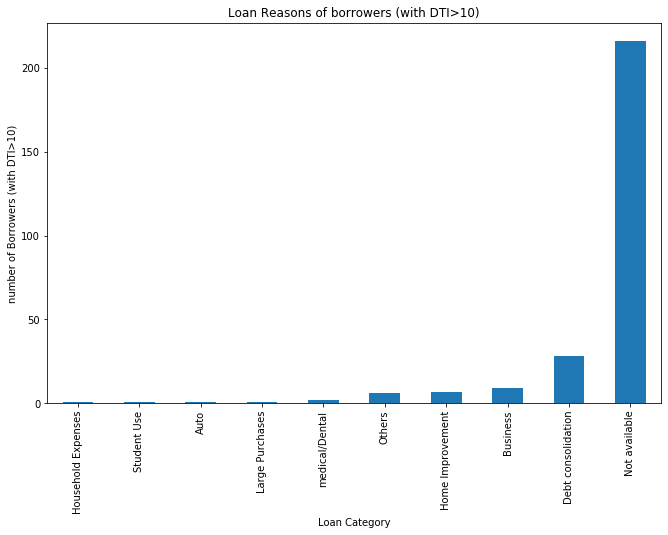

In [40]:
#defining the size of the figure
plt.figure(figsize=(11,7))
#Plot the 
df.query('DebtToIncomeRatio>10')['LoanReason'].value_counts().head(10).sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Loan Category')
plt.ylabel('number of Borrowers (with DTI>10)')
plt.title('Loan Reasons of borrowers (with DTI>10)')

- The majority of borrowers with a high debt do not give justification on why they want loans. But we see debt consolidation as the second reason why borrower has a very high debt to income ration. Meaning that their owe is 10 times greater than their incomes.

#### Let's check if these are members with multiple loans

In [41]:
# members with multiple loans and high Debt to income Ratio
df.query('DebtToIncomeRatio>10')['MemberKey'].value_counts().head(10).sort_values(ascending=True)

BE12350385509408369139B    2
A0A2337845717361946A887    2
4F013385803925881A33A27    2
7B8A33660740310807D7132    2
236235310279146801E6DA0    2
D1CC338379438775525B64C    2
1B6B3379779129252096E15    2
574C3374106242551D3C75E    2
7E6F338235940229482671E    2
FF1B34297677368384F27F8    3
Name: MemberKey, dtype: int64

- The highest numbers of loan here is three. 

In [42]:
df.query('DebtToIncomeRatio>10')['IncomeRange'].value_counts()

$1-24,999         187
Not displayed      59
Not employed       24
$50,000-74,999      1
$100,000+           1
Name: IncomeRange, dtype: int64

- We see many people with a small range income have a high debt to income ration. Is this related to the Borrower APR?

### What are  the  BorrowerAPR of the loans?        

In [43]:
#Summary statistics of the borrower APR
df['BorrowerAPR'].describe()

count    113778.000000
mean          0.218805
std           0.080387
min           0.006530
25%           0.156290
50%           0.209710
75%           0.283700
max           0.512290
Name: BorrowerAPR, dtype: float64

- The majority of borrower get a loan with an annual percentage rate of 21% 

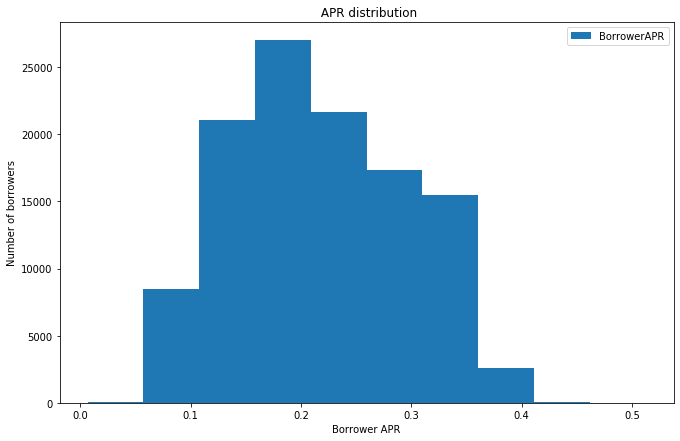

In [44]:
#Graphic representation of Annual Percentage Rate of borrowers
#defining the size of the figure
plt.figure(figsize=(11,7))
df['BorrowerAPR'].plot(kind='hist')
#setting title
plt.xlabel('Borrower APR') 
plt.ylabel('Number of borrowers')
plt.title(' APR distribution')
plt.legend()

-  The Majority of borrower use an APR of 20%. This value goes up to 50%. But very few people reach the value of 50%. Let's find Which Category of loan is this assigned to an APR of 40%?

#### Which loan category  has an annual percentage rate greater than 40%?

In [45]:
# number of Loans with an APR > 0.4 grouped by reasons  
df.query('BorrowerAPR > 0.4')['LoanReason'].value_counts()

Debt consolidation    39
Others                38
Not available          8
Auto                   6
Home Improvement       6
Business               5
Name: LoanReason, dtype: int64

- Annual Percentage rate of 40 % correspond mostly to debt consolidation and others reasons.

###  IsBorrowerHomeowner? 

In [46]:
# how many possible answers can we have?
df['IsBorrowerHomeowner'].nunique()

2

Text(0.5, 1.0, 'Borrower with or without a house')

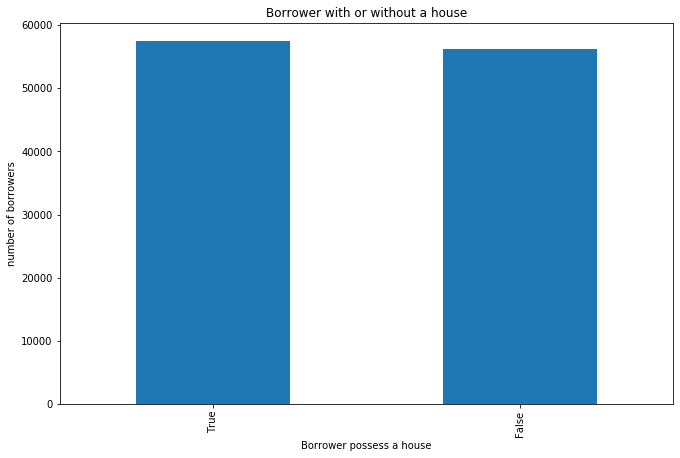

In [47]:
#defining the size of the figure
plt.figure(figsize=(11,7))
#Counting the number of loan with houses or not and plotting of histogram
df['IsBorrowerHomeowner'].value_counts().plot(kind='bar')
#setting axis titles
plt.xlabel('Borrower possess a house') 
plt.ylabel('number of borrowers')
# Title of the plot
plt.title('Borrower with or without a house')


- Loan are given to homeowner as much as to people who are not homeowner.

### Which term of each Loan?

In [48]:
df['Term'].nunique()

3

- There are three specific terms for the loans.

In [49]:
df['Term'].describe()

count    113803.000000
mean         40.835936
std          10.441038
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

- Borrower mostly take loans with 36 monts terms. These loans vary between 12,36 and 60 months.

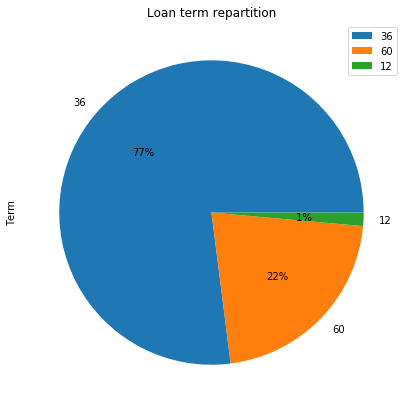

In [50]:
#defining the size of the figure
plt.figure(figsize=(11,7))
#Plotting of the pie chart
df['Term'].value_counts().head(3).plot(kind='pie', autopct='%2.f%%')
plt.title('Loan term repartition')
plt.legend()
plt.show()

- 77% of borrowers take loan of 36 months term. only 1% use short term loan and 22% the long term one. Which category of borrowers use this and what for?

In [51]:
df.query('Term ==12')['Occupation'].value_counts()

Other                                 369
Professional                          230
Computer Programmer                   132
Executive                              76
Analyst                                71
Accountant/CPA                         59
Sales - Commission                     43
Sales - Retail                         42
Administrative Assistant               39
Engineer - Electrical                  39
Nurse (RN)                             37
Teacher                                36
Retail Management                      32
Skilled Labor                          31
Construction                           30
Truck Driver                           24
Civil Service                          24
Attorney                               24
Food Service                           22
Engineer - Mechanical                  22
Clerical                               19
Food Service Management                15
Doctor                                 14
Professor                         

Text(0.5, 1.0, 'Borrower choosing a short term loan')

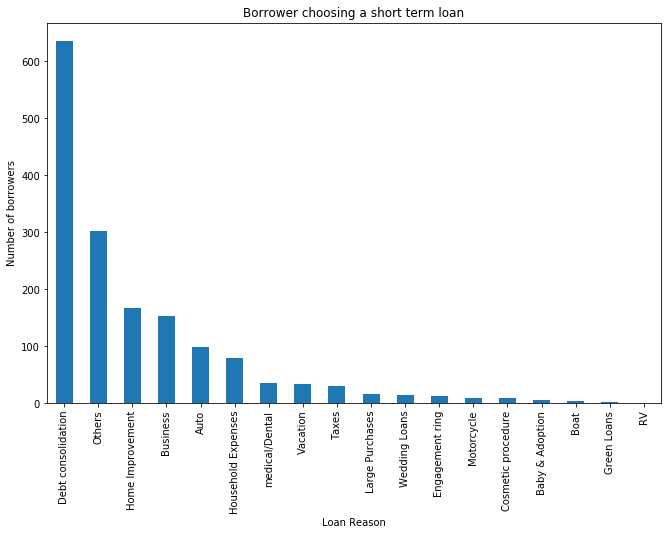

In [52]:
#defining the size of the figure
plt.figure(figsize=(11,7))
df.query('Term ==12')['LoanReason'].value_counts().plot(kind='bar')
#setting axis titles
plt.xlabel('Loan Reason') 
plt.ylabel('Number of borrowers')
# Title of the plot
plt.title('Borrower choosing a short term loan')

- Debt consolidation remain the most used reason even for short term loans.

In [53]:
df.query('Term ==60')['Occupation'].value_counts()

Other                          6153
Professional                   3219
Executive                      1076
Teacher                         835
Analyst                         824
                               ... 
Student - College Senior          9
Judge                             6
Student - College Freshman        4
Student - College Sophomore       3
Student - College Junior          3
Name: Occupation, Length: 65, dtype: int64

In [54]:
df.query('Term ==60')['LoanReason'].value_counts()

Debt consolidation    17198
Home Improvement       1858
Others                 1523
Business               1297
Household Expenses      518
medical/Dental          447
Auto                    381
Large Purchases         295
Wedding Loans           282
Taxes                   242
Vacation                180
Motorcycle               88
Baby & Adoption          87
Engagement ring          62
Boat                     28
Cosmetic procedure       21
RV                       20
Green Loans              17
Not available             1
Name: LoanReason, dtype: int64

- Debt consolidation can spend 12,36, 60 months for Debt consolidation. There are loans that are exclusively for 36 months Terms like Student use, personal loan...

###  How many months did the loan spend since origination?

In [55]:
df['LoanMonthsSinceOrigination'].describe()

count    113803.000000
mean         31.829890
std          29.927986
min           0.000000
25%           6.000000
50%          21.000000
75%          65.000000
max         100.000000
Name: LoanMonthsSinceOrigination, dtype: float64

In [56]:
df.query('LoanMonthsSinceOrigination > 36').describe(include='all')

,LoanKey,MemberKey,LoanOriginalAmount,Term,LoanStatus,BorrowerRate,BorrowerAPR,IncomeRange,DebtToIncomeRatio,CreditScoreRangeUpper,Occupation,EmploymentStatus,IsBorrowerHomeowner,LoanMonthsSinceOrigination,Recommendations,LoanReason
count,37529,37529,37529.000000,37529.000000,37529,37529.000000,37504.000000,37529,37529.000000,36938.000000,35306,35306,37529,37529.000000,37529.000000,37529
unique,37529,31972,NaN,NaN,11,NaN,NaN,8,NaN,NaN,67,8,2,NaN,NaN,8
top,6F9A34036185689680E0151,7E1733653050264822FAA3D,NaN,NaN,Completed,NaN,NaN,"$25,000-49,999",NaN,NaN,Other,Full-time,False,NaN,NaN,Not available
freq,1,7,NaN,NaN,25475,NaN,NaN,10806,NaN,NaN,9303,23772,20399,NaN,NaN,16813
mean,NaN,NaN,5890.602681,35.997442,NaN,0.188862,0.204571,NaN,0.286322,680.150577,NaN,NaN,NaN,70.668736,0.120387,NaN
std,NaN,NaN,5279.811976,1.557261,NaN,0.080641,0.085496,NaN,0.816142,81.334722,NaN,NaN,NaN,15.958290,0.519295,NaN
min,NaN,NaN,1000.000000,12.000000,NaN,0.000000,0.006530,NaN,0.000000,439.000000,NaN,NaN,NaN,37.000000,0.000000,NaN
25%,NaN,NaN,2500.000000,36.000000,NaN,0.124000,0.135620,NaN,0.110000,619.000000,NaN,NaN,NaN,66.000000,0.000000,NaN
50%,NaN,NaN,4000.000000,36.000000,NaN,0.176500,0.187260,NaN,0.190000,679.000000,NaN,NaN,NaN,73.000000,0.000000,NaN
75%,NaN,NaN,7500.000000,36.000000,NaN,0.250000,0.267620,NaN,0.290000,739.000000,NaN,NaN,NaN,83.000000,0.000000,NaN


- 37529 spend more than three years(36 months) to cover their loans

In [57]:
# is this because of their low income?
df.query('LoanMonthsSinceOrigination > 36')['IncomeRange'].value_counts().head(10).sort_values(ascending=True)

Not employed        235
$0                  590
$1-24,999          3290
$100,000+          3315
$75,000-99,999     3769
Not displayed      7607
$50,000-74,999     7917
$25,000-49,999    10806
Name: IncomeRange, dtype: int64

In [58]:
#Loan that spent more than 36 months
df.query('LoanMonthsSinceOrigination > 36')['LoanReason'].value_counts().head(10).sort_values(ascending=True)

Student Use             756
Auto                    808
Home Improvement       1441
Personal Loan          2395
Business               2756
Others                 3393
Debt consolidation     9167
Not available         16813
Name: LoanReason, dtype: int64

- Student use and personal loan are 36 months term loans. We see that many loans have exceeded their term.

### 10  Recommendations

In [59]:
df['Recommendations'].describe()

count    113803.000000
mean          0.048083
std           0.332544
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: Recommendations, dtype: float64

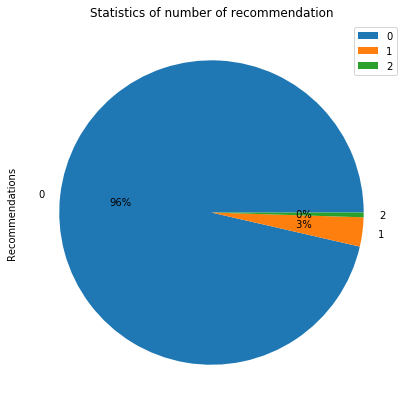

In [60]:
plt.figure(figsize=(11,7))
df['Recommendations'].value_counts().head(3).plot(kind='pie', autopct='%2.f%%')
plt.title('Statistics of number of recommendation')
plt.legend()
plt.show()

- The number of recommendation does not affect loan. 96% of borrower do not have recommendation

### 12  LoanStatus

In [61]:
df['LoanStatus'].describe()

count      113803
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object

- Loans are qualify by 12 different status. Most loans are still current.

In [62]:
df['LoanStatus'].isnull().sum()

0

#### which status appear the most?

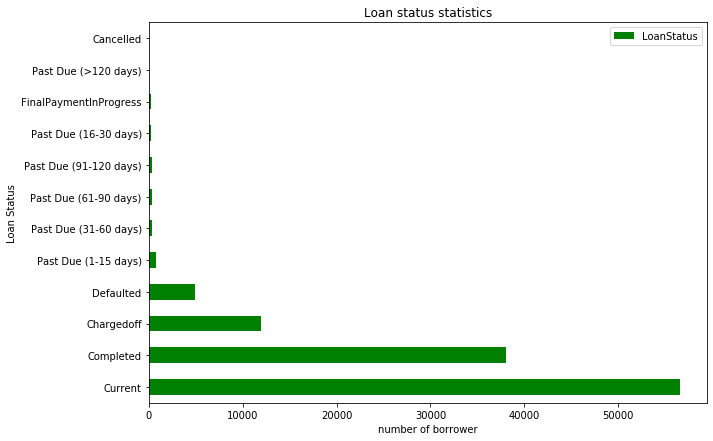

In [63]:
#Setting figure size
plt.figure(figsize=(10,7))
#Plotting of Loan status repartition
df['LoanStatus'].value_counts().plot(kind='barh', color='green')
# setting titles
plt.xlabel('number of borrower') 
plt.ylabel('Loan Status')
plt.title('Loan status statistics')
plt.legend()


- Most of the loan are still current, there are few ones that are past due, some are defaulted

In [64]:
#defaulted loan
defaulted=df.query('LoanStatus =="Defaulted"')
defaulted

,LoanKey,MemberKey,LoanOriginalAmount,Term,LoanStatus,BorrowerRate,BorrowerAPR,IncomeRange,DebtToIncomeRatio,CreditScoreRangeUpper,Occupation,EmploymentStatus,IsBorrowerHomeowner,LoanMonthsSinceOrigination,Recommendations,LoanReason
15,3EE2364952142596779635D,924335448287456229847ED,4000,36,Defaulted,0.3177,0.35797,"$50,000-74,999",0.49,719.0,Other,Other,True,23,0,Household Expenses
23,D0623679715048926AB9F4D,93173576199169167625E6A,2000,36,Defaulted,0.2419,0.28032,"$25,000-49,999",0.39,699.0,Skilled Labor,Employed,False,11,0,medical/Dental
107,7CFF3648516528223B4647C,2077354292658772372C378,4000,36,Defaulted,0.3177,0.35797,"$25,000-49,999",0.54,739.0,Administrative Assistant,Employed,False,23,0,Debt consolidation
128,3E543374129385598C2F1DD,2CAE33715881115270D394A,1000,36,Defaulted,0.1700,0.18824,Not displayed,0.03,519.0,Other,Not available,True,88,0,Not available
138,A6773646313973238A33299,87C83528199783859742DC3,3000,36,Defaulted,0.2999,0.33973,"$25,000-49,999",0.35,639.0,Military Enlisted,Employed,True,24,0,Auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113840,7D5F35735010399139AA191,A29433928941492074677BF,1400,36,Defaulted,0.2000,0.22674,"$1-24,999",0.19,679.0,Teacher's Aide,Full-time,False,51,0,Others
113847,EEDC3389721799329EBE7A9,C9EF3388271822006D7A6B5,8000,36,Defaulted,0.2000,0.20735,"$100,000+",0.38,759.0,Dentist,Full-time,True,82,0,Not available
113914,063D3366920498906816DA9,A4583365144098450CD0C50,3000,36,Defaulted,0.2500,0.25757,Not displayed,0.05,539.0,NaN,NaN,False,91,0,Not available
113918,D97D342416183363929B094,94BE342415954395457380E,7000,36,Defaulted,0.1080,0.12201,"$50,000-74,999",0.39,759.0,Social Worker,Full-time,True,69,0,Personal Loan


#### Which category of borrower defaulted the most?

In [65]:
#def Plot_bar(dataframe,column_name):
   # dataframe.colum_name.value_counts.head(10).plot(kind='barh')
    #plt.show()

Text(0.5, 1.0, 'Number of defaulted loans per borrower occupation ')

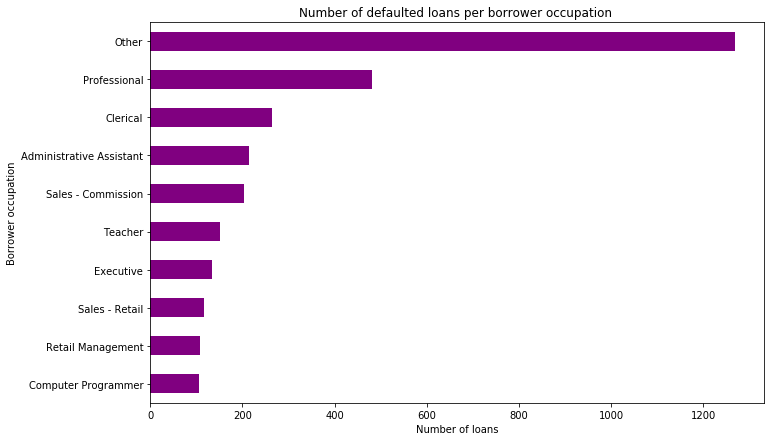

In [66]:
#defining the size of the figure
plt.figure(figsize=(11,7))
defaulted.Occupation.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='purple')
plt.xlabel('Number of loans')
plt.ylabel('Borrower occupation')
plt.title('Number of defaulted loans per borrower occupation ')


- Borrower that mostly Defaulted loans do other work.

Text(0.5, 1.0, 'Number of defaulted loans per Reason ')

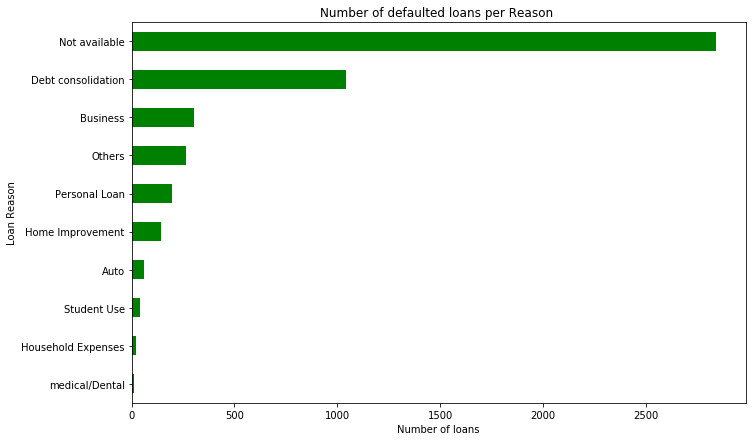

In [67]:
#defining the size of the figure
plt.figure(figsize=(11,7))

defaulted.LoanReason.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='green')
#setting axis and plot titles 
plt.xlabel('Number of loans')
plt.ylabel('Loan Reason')
plt.title('Number of defaulted loans per Reason ')

- Most of the defaulted loan do not have precision on the loan reason

### What are the employment status of the borrowers?

In [68]:
df['EmploymentStatus'].describe()

count       111580
unique           8
top       Employed
freq         67322
Name: EmploymentStatus, dtype: object

Text(0.5, 1.0, 'Loan repartition according to the borrower employment status')

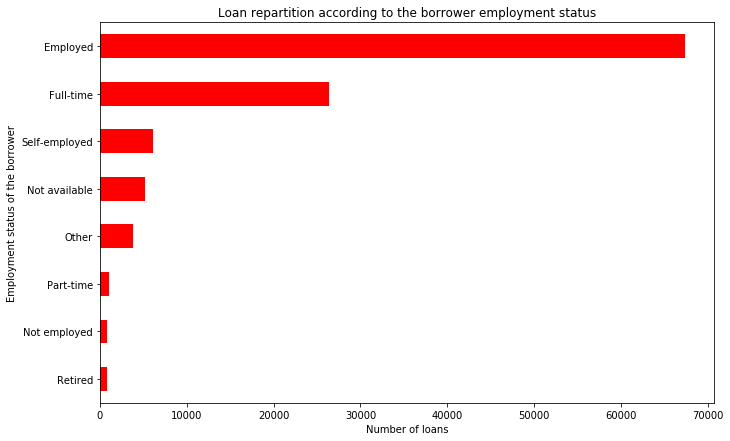

In [69]:
#defining the size of the figure
plt.figure(figsize=(11,7))
# plotting of Employment status
df['EmploymentStatus'].value_counts().sort_values(ascending=True).plot(kind='barh', color='RED')
#setting axis and plot titles
plt.xlabel('Number of loans')
plt.ylabel('Employment status of the borrower')
plt.title('Loan repartition according to the borrower employment status')

- People that borrow the most are employed but we see that there are category of people that are full time and other  employed. So we are going to replace employed by full time. 

In [70]:
#replacing the word Employed by Full-time
df['EmploymentStatus'] = df['EmploymentStatus'].replace(['Employed'],'Full-time')

Text(0.5, 1.0, 'Loan repartition according to the borrower employment status')

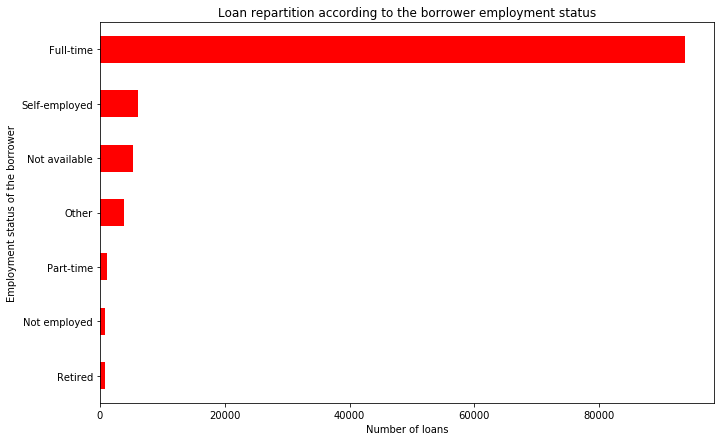

In [71]:
#defining the size of the figure
plt.figure(figsize=(11,7))
# plotting of Employment status
df['EmploymentStatus'].value_counts().sort_values(ascending=True).plot(kind='barh', color='RED')
#setting axis and plot titles
plt.xlabel('Number of loans')
plt.ylabel('Employment status of the borrower')
plt.title('Loan repartition according to the borrower employment status')

- Full time job borrow the most.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 
> Loan are attributed to differents borrower depending on his occupation and his income range
> The Borrower APR varies from 0 to 50 % and the majority of borrower used 21% as APR
> 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> we found 5 columns with missing values. 
> We found outliers when investigating the  Credit Score Range Upper.
> We created a  new column call 'loanReason' to replace and drop 'ListingCategory (numeric)'


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [72]:
# Gathering all quantitative variables together
quantitative=["CreditScoreRangeUpper","DebtToIncomeRatio","LoanOriginalAmount","BorrowerAPR","BorrowerRate","Term","LoanMonthsSinceOrigination","Recommendations"]

Text(0.5, 1, 'Relationship between all numeric variables')

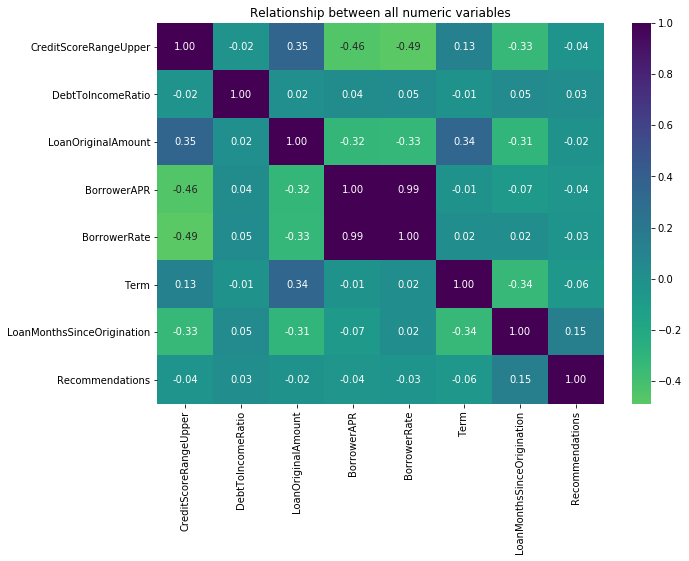

In [73]:
#Heat Map
plt.figure(figsize=[10,7])
sb.heatmap(df[quantitative].corr(), annot = True, fmt = '.2f',
           cmap = 'viridis_r', center = 0)
#sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis_r', center = 0)
#title
plt.title("Relationship between all numeric variables")

- Loan Original amount has a negative relationship with the Borrower APR
- There is a negative correlation between  Credit score and borrower rate
- Credit score  and borrower rate have negative correlation
- The Loan Original amount and the Credit Score Range Upper are positively correlated
- The Loan Original amount and the Term of the loan are positively correlated
- Borrower rate and Borrower APR are strongly positively correlated


#### Borrower APR vs Borrower rate

Text(0.5, 1.0, 'Relation between Borrower Rate and Borrower APR')

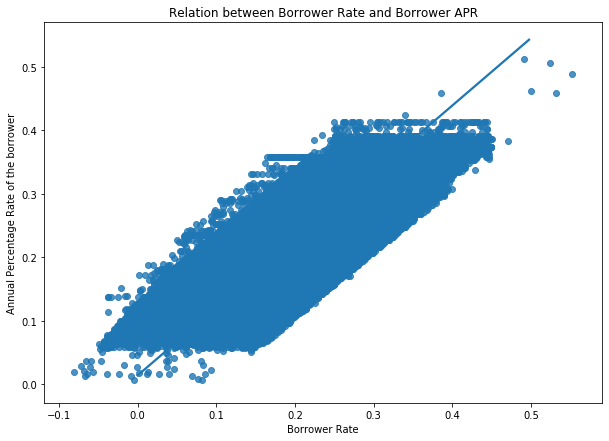

In [74]:
# Bivariate Plot
#plt.subplot(1, 2, 1) x_jitter=0.04, scatter_kws={'alpha':1/10}
plt.figure(figsize=(10,7))
sb.regplot(data = df, x = 'BorrowerRate', y = 'BorrowerAPR',x_jitter=0.1, fit_reg=True) 
plt.xlabel('Borrower Rate') 
plt.ylabel('Annual Percentage Rate of the borrower')
plt.title('Relation between Borrower Rate and Borrower APR')

- The Borrower APR increases as the borrower rate increase but there are others parameters that may be use to determine the Borrower APR. What about the borrowerRate and the original amount of the Loan? 

### BorrowerRate and Loan Original Amount

Text(0.5, 1.0, 'Relation between Borrower Rate and Original amount of the loan')

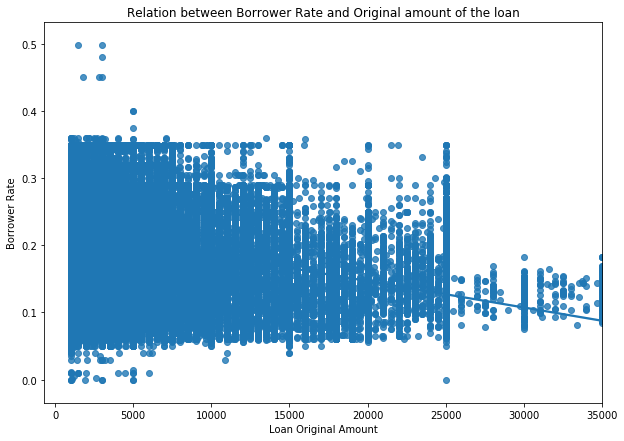

In [75]:
# Bivariate Plot
#plt.subplot(1, 2, 1) x_jitter=0.04, scatter_kws={'alpha':1/10}
plt.figure(figsize=(10,7))
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate',x_jitter=0.3, fit_reg=True) 
plt.xlabel('Loan Original Amount') 
plt.ylabel('Borrower Rate')
plt.title('Relation between Borrower Rate and Original amount of the loan')

- Borrower Rate decrease as the original amount increase.

Text(0.5, 1.0, 'Relation between Debt to income ratio and loan amount')

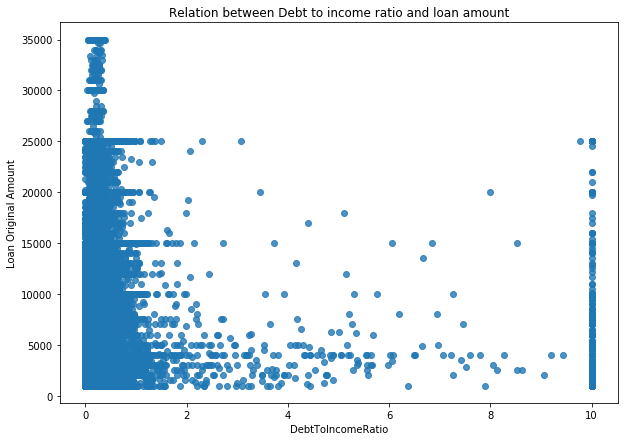

In [76]:
plt.figure(figsize=(10,7))
sb.regplot(data = df, x= 'DebtToIncomeRatio', y = 'LoanOriginalAmount', fit_reg=False) 
plt.xlabel('DebtToIncomeRatio') 
plt.ylabel('Loan Original Amount')
plt.title('Relation between Debt to income ratio and loan amount')
#plt.legend()

- Borrower with loan original amount above 25,000 Dollars are people with very small Debt to income ratio. below 25000 Dollars the debt to income Ratio of borrower vary a lot. We can say that Debt to Income ratio is a key indicator when a borrower a loan greater than 25000 Dollars. This may relate the original amount to the category of the borrower.

### BorrowerAPR&Term

Text(0.5, 1.0, 'Relation between the term of the loan and Borrower APR')

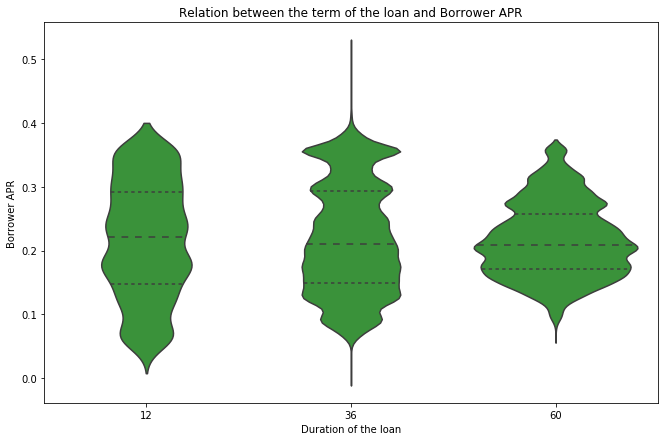

In [77]:
plt.figure(figsize = [11, 7])
color=sb.color_palette()[2]
sb.violinplot(data=df,x="Term",y="BorrowerAPR",color=color,inner="quartile")
# labels and title
plt.xlabel("Duration of the loan");
plt.ylabel("Borrower APR");
plt.title("Relation between the term of the loan and Borrower APR")

- 36 months loan has a wider range of Borrower APR. let's apply the FacetGrid to get more insight

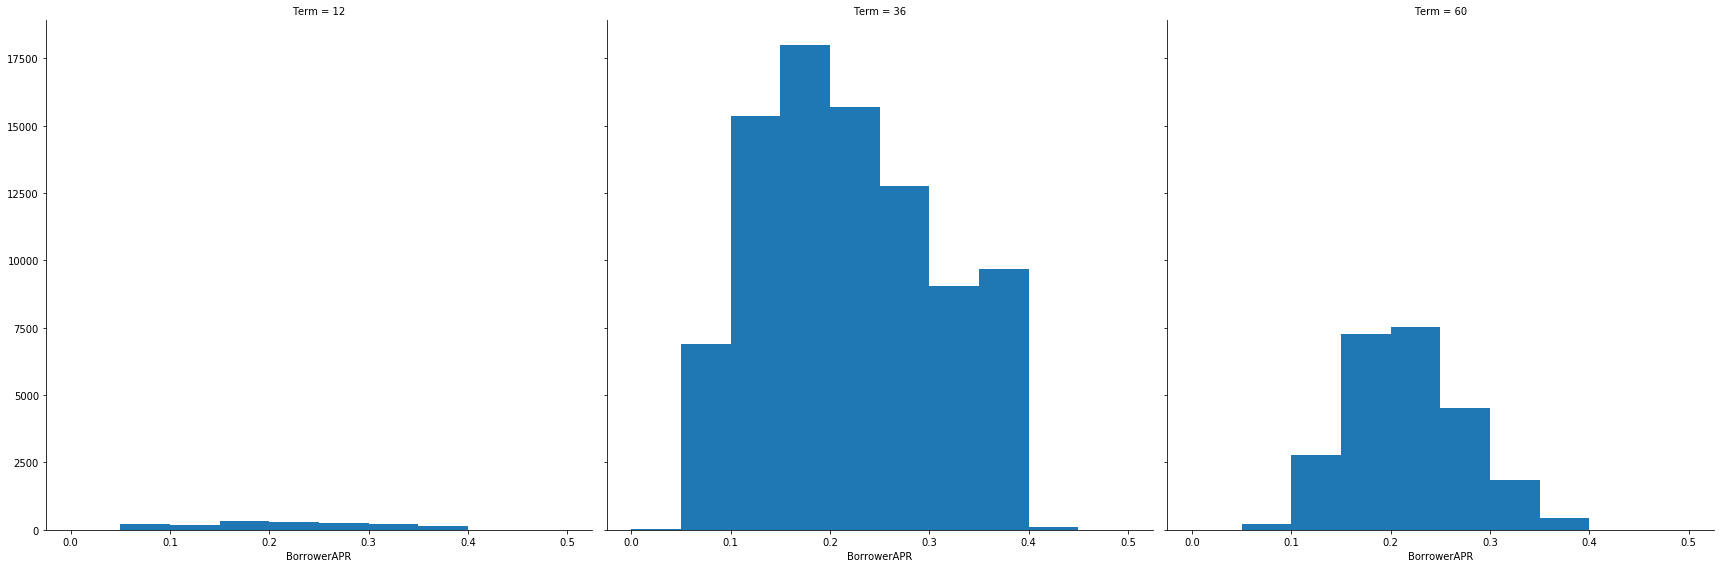

In [78]:
fg=sb.FacetGrid(data=df,col="Term",height=8)
binlim=np.arange(0,0.5+0.05,.05)
fg.map(plt.hist,"BorrowerAPR",bins=binlim)

- Now, we clearly see that 36 months term has the wider borrower APR and is the most used term as compare to the two other

Text(0.5, 1.0, 'Relation between loan Original amount and Credit score of the borrower')

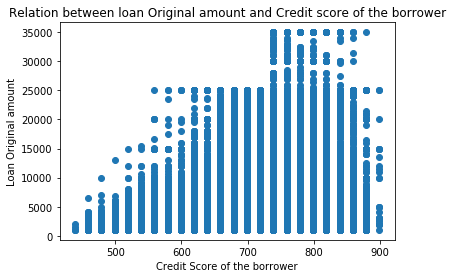

In [79]:
# Bivariate plot between credit score and Loan Original amount
#plt.figure(figsize=(8,6))
plt.scatter(data=df,x='CreditScoreRangeUpper', y='LoanOriginalAmount')
plt.xlabel('Credit Score of the borrower') 
plt.ylabel('Loan Original amount')
plt.title('Relation between loan Original amount and Credit score of the borrower')
#plt.legend()

- The original amount of the loan increase as the credit score increases. higher the credit score is higher is the original amount. 

#### Relation between Loan amount and Loan reason

Text(0.5, 1.0, 'Relation between loan Original amount and loan category')

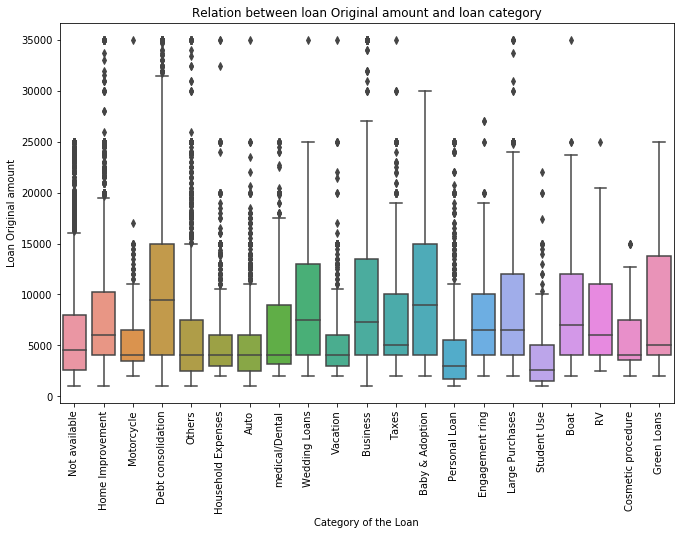

In [80]:
#Relation between Original amount and Category of the loan
plt.figure(figsize=(11,7))
sb.boxplot(data=df, x='LoanReason', y='LoanOriginalAmount')
plt.xlabel('Category of the Loan') 
plt.ylabel('Loan Original amount')
plt.xticks(rotation=90)
plt.title('Relation between loan Original amount and loan category')
#plt.legend()

- Loan for student use the lowest median and loan for Debt consolidation has the highest median. This means that The smallest amount are taken for student use and the highest amount for debt consolidation. From the previous observation this may implies that debt consolilation loans have less interest rate than loan for student use. Let's chech this

#### BorrowerAPR & Loan Reason

Text(0.5, 1.0, 'Relation between BorrowerAPR and loan category')

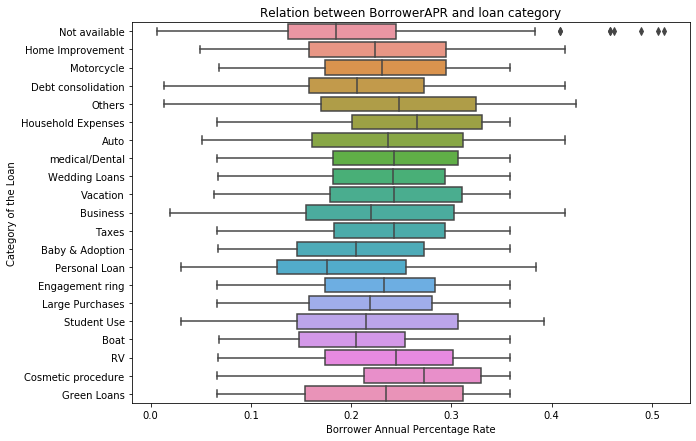

In [81]:
#Relation between Borrower APR and Category of the loan
plt.figure(figsize=(10,7))
sb.boxplot(data=df, x='BorrowerAPR', y='LoanReason')
plt.xlabel('Borrower Annual Percentage Rate') 
plt.ylabel('Category of the Loan')
plt.title('Relation between BorrowerAPR and loan category')
#plt.legend()

- Personal loans have the lowest median. and Debt consolidation loan have lower interest than loans for student use.

### Relation between the status of the loan and the Borrower APR

No handles with labels found to put in legend.


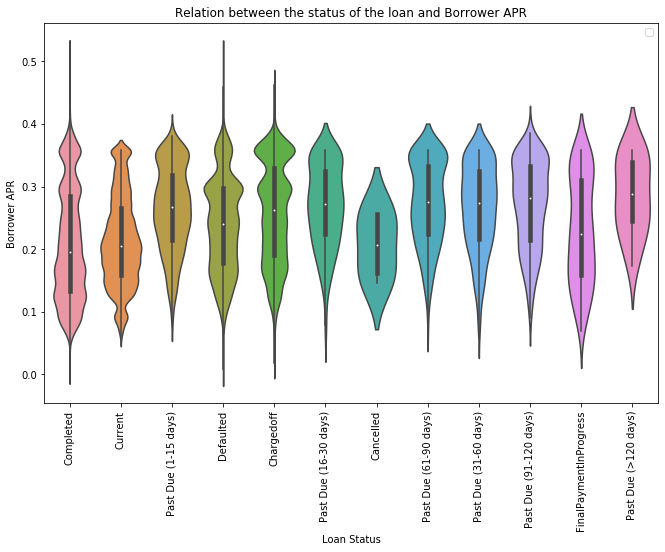

In [82]:
plt.figure(figsize=(11,7))
sb.violinplot(data=df, x='LoanStatus', y='BorrowerAPR')
plt.xlabel('Loan Status') 
plt.ylabel('Borrower APR')
plt.xticks(rotation=90)
plt.title('Relation between the status of the loan and Borrower APR')
plt.legend()

Text(0.5, 1.0, 'Relation between Income Range and Term of the loan')

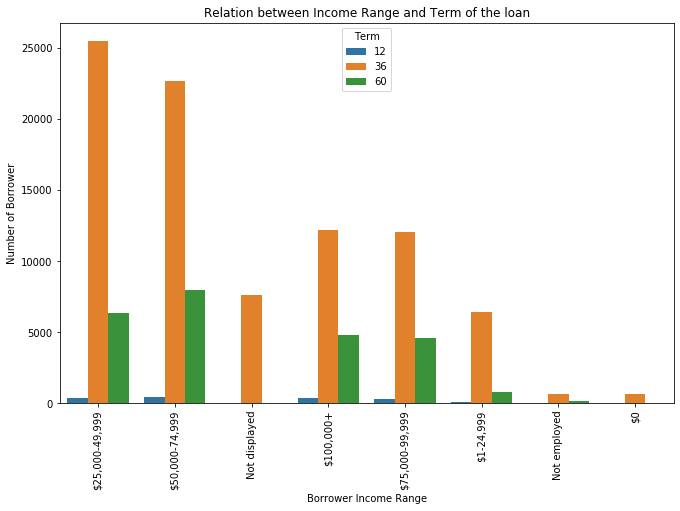

In [83]:
plt.figure(figsize=(11,7))
sb.countplot(data=df,x="IncomeRange",hue="Term")
plt.xticks(rotation=90)
plt.xlabel('Borrower Income Range') 
plt.ylabel('Number of Borrower')
plt.xticks(rotation=90)
plt.title('Relation between Income Range and Term of the loan')

- Whatever be the income range, Borrower prefer to get loan with 36 Months term in priority if not they choose 60 months term. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Borrower APR decrease with the amount. This show that there are other factor 
>- Borrower APR has strongly relationship with prosper score
>- 36 months loan term has the heighst frequency and wider Borrower APR range
>- People prefer to take loan with 36 months term and it is not depend on the income rang

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>- A high credit score rate lead to a high loan amount
>- The interest rate decrease as the original amount of te Loan increase
>- People with high monthly income taking high loans and Students take the lowest loan original amounts
>- Loan for Debt consolidation is the most demanded
>- Most borrower are employed
>- The most common income range of the borrower is 25,000-49,999 Dollars
    
    


## Multivariate Exploration


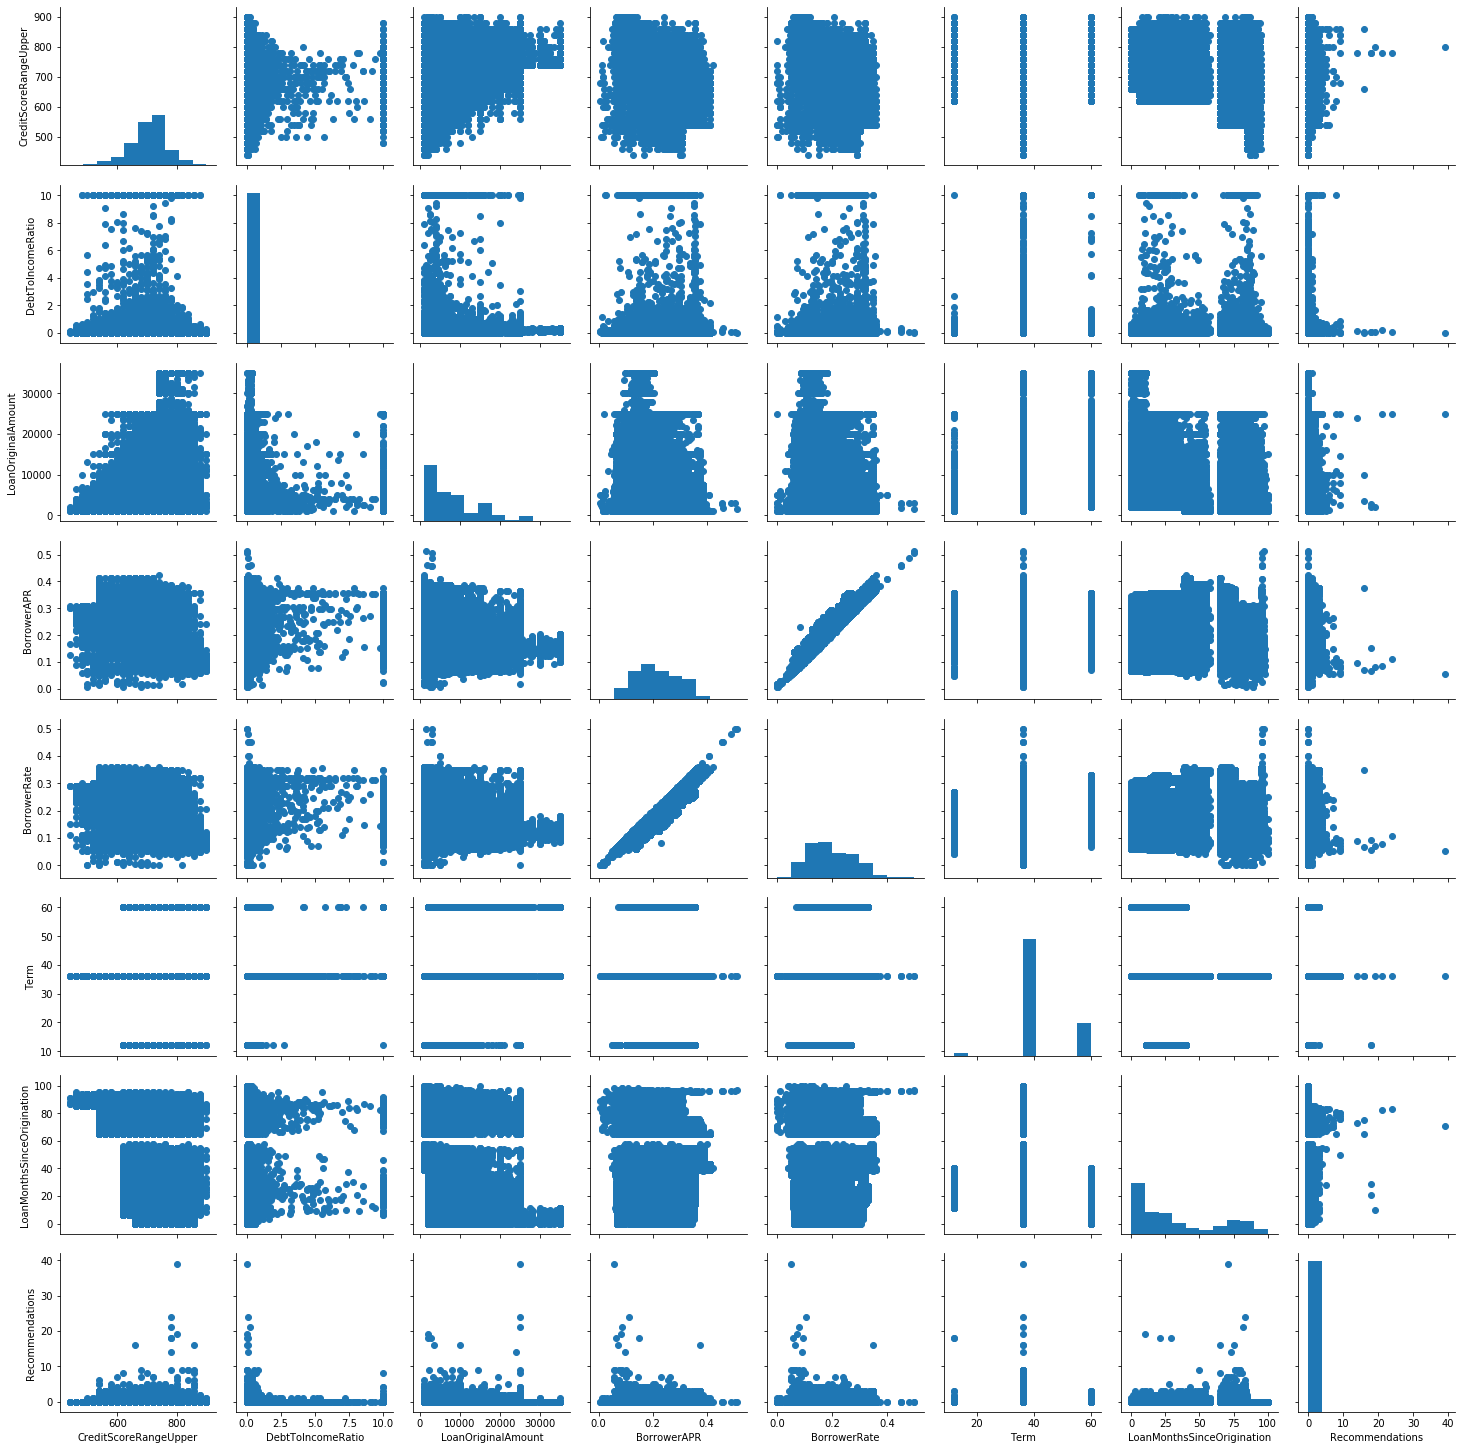

In [84]:
g = sb.PairGrid(data = df, vars = ["CreditScoreRangeUpper","DebtToIncomeRatio","LoanOriginalAmount","BorrowerAPR","BorrowerRate","Term","LoanMonthsSinceOrigination","Recommendations"])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

- Loan with 36 months term are loan with highest Borrower APR and Borrower Rate

###  Is the Loan Original amount function of income range and term of the loan?

Text(0.5, 1.0, 'Relation between Income Range and loan original amount')

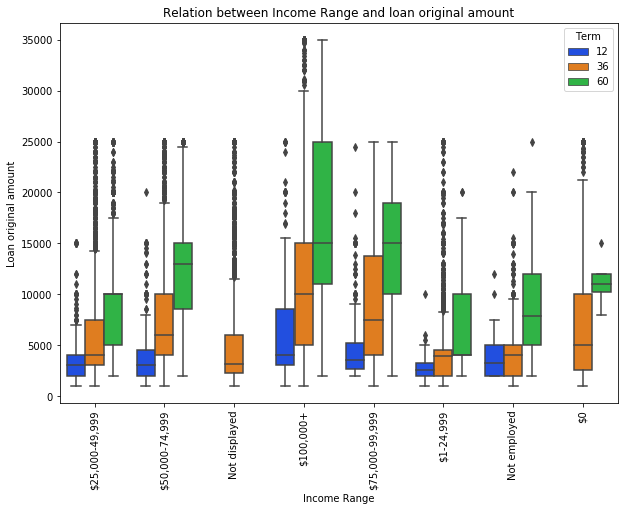

In [85]:
plt.figure(figsize=(10,7))
# multidimensional plot
sb.boxplot(data=df, x='IncomeRange',y='LoanOriginalAmount',palette='bright', hue='Term')
plt.xticks(rotation=90)
plt.xlabel('Income Range')
plt.ylabel('Loan original amount')
plt.title('Relation between Income Range and loan original amount')

- Short term loan are only use for borrower with a considerable income range; Borrower with very low income can only access loan of 36 months term 
- The term of the loan depend on the original amount of a loan and the income range of the borrower. 
- A borrower with high income range can get very high loan with a various type of term


### Relation between the LoanOriginalAmount, BorrowerAPR and Term

Text(0.5, 1, 'Relation between Borrower APR and loan original amount')

<Figure size 792x504 with 0 Axes>

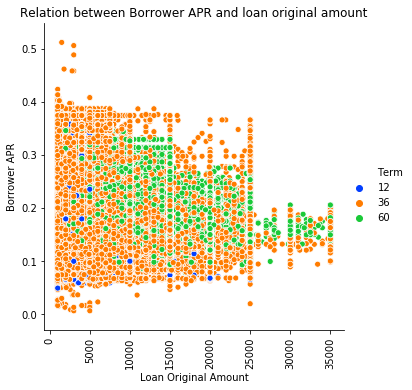

In [86]:
plt.figure(figsize=(11,7))
sb.relplot(kind='scatter', data=df, x='LoanOriginalAmount',y='BorrowerAPR',palette='bright', hue='Term')
plt.xticks(rotation=90)
#
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.title('Relation between Borrower APR and loan original amount')

- Small amount with 36 months terms get the highest APR.

### Relation between Loan Original Amount & Loan Status &  Employment Status

Text(0.5, 1.0, 'The relation between Loan Original Amount & Loan Status &  Employment Status')

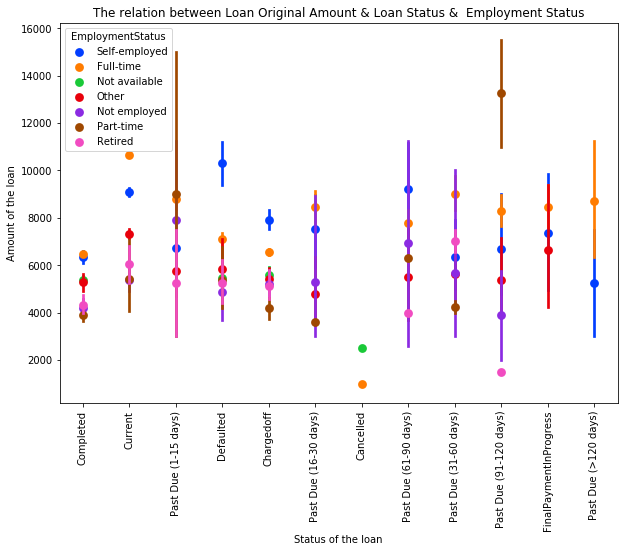

In [87]:
plt.figure(figsize=(10,7))
sb.pointplot(x='LoanStatus', y='LoanOriginalAmount',data=df, palette='bright',hue='EmploymentStatus',linestyles="")
plt.xticks(rotation=90)
plt.ylabel("Amount of the loan")
plt.xlabel("Status of the loan")
plt.title("The relation between Loan Original Amount & Loan Status &  Employment Status")

- Borrower with part time job take considerable loan(>10 000) and get past due loan.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Borrower APR is high for borrower with small income range .
> Borrower APR has strongly relationship with Borrower rate
> 36 months loan term has the heighst frequency and wider Borrower APR range
> People prefer to take loan with 36 months term and it is not depend on the income range

### Were there any interesting or surprising interactions between features?

>- Peoples take loan for Debt consolidation more than any category
>- Students take the lowest loan original amounts
>- Borrower with high score range can get loans with high amount and small borrower APR
>- The highest is income range the highest can be the loan original amount and the term of the loan
>- Student pay the biggest APR

## Conclusions
> Borrower with loan original amount above 25,000 Dollars are people with very small Debt to income ratio. below 25000 Dollars the debt to income Ratio of borrower vary a lot. We can say that Debt to Income ratio is a key indicator when a borrower want a loan greater than 25000 Dollars. This may relate the original amount to the category of the borrower.
moreover,Short term loan are only use for borrower with a considerable income range; 
>- Borrower with very low income can only access loan of 36 months term  
>- The term of the loan depend on the original amount of a loan and the income range of the borrower. 
>- A borrower with high income range can get very high loan with a various type of term
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
